In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = None
np.random.seed(123)

## Importando los datos de tweets

In [3]:
# Leemos los datos
df = pd.read_csv('data/sem_eval_train_es.csv', index_col=None)
df.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-Es-01643,"@aliciaenp Ajajjaa somos del clan twitteras perdidas pa eventos ""importantes""",False,False,False,False,True,False,False,False,False,False,False
1,2018-Es-05142,@AwadaNai la mala suerte del gato fichame la cara de help me pls,False,False,False,True,False,False,False,True,False,False,False
2,2018-Es-05379,@audiomano A mí tampoco me agrado mucho eso. Especialmente por tratarse de él. No hay justificación.,True,False,False,False,False,False,False,False,False,False,False
3,2018-Es-00208,"Para llevar a los bebes de un lugar a otro debemos cantarles canciones... Quiero cantarles Gunaa' nibiina (La llorona, en Zapoteco)",False,False,False,False,True,False,False,False,False,False,False
4,2018-Es-01385,"@DalasReview me encanta la terrible hipocresia y doble moral que tiene esta gente, claro, cuando ella te lo quita ILEGALMENTE no importa...",True,False,True,False,False,False,False,False,False,False,False


In [4]:
df.shape

(3561, 13)

## Preprocesado

In [5]:
# Transformand los datos a valor 1 y 0 
df.anger = [1 if x==True else 0 for x in df.anger]
df.anticipation = [1 if x==True else 0 for x in df.anticipation]
df.disgust = [1 if x==True else 0 for x in df.disgust]
df.fear = [1 if x==True else 0 for x in df.fear]
df.joy = [1 if x==True else 0 for x in df.joy]
df.love = [1 if x==True else 0 for x in df.love]
df.optimism = [1 if x==True else 0 for x in df.optimism]
df.pessimism = [1 if x==True else 0 for x in df.pessimism]
df.sadness = [1 if x==True else 0 for x in df.sadness]
df.surprise = [1 if x==True else 0 for x in df.surprise]
df.trust = [1 if x==True else 0 for x in df.trust]

In [6]:
df.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2018-Es-01643,"@aliciaenp Ajajjaa somos del clan twitteras perdidas pa eventos ""importantes""",0,0,0,0,1,0,0,0,0,0,0
1,2018-Es-05142,@AwadaNai la mala suerte del gato fichame la cara de help me pls,0,0,0,1,0,0,0,1,0,0,0
2,2018-Es-05379,@audiomano A mí tampoco me agrado mucho eso. Especialmente por tratarse de él. No hay justificación.,1,0,0,0,0,0,0,0,0,0,0
3,2018-Es-00208,"Para llevar a los bebes de un lugar a otro debemos cantarles canciones... Quiero cantarles Gunaa' nibiina (La llorona, en Zapoteco)",0,0,0,0,1,0,0,0,0,0,0
4,2018-Es-01385,"@DalasReview me encanta la terrible hipocresia y doble moral que tiene esta gente, claro, cuando ella te lo quita ILEGALMENTE no importa...",1,0,1,0,0,0,0,0,0,0,0


In [7]:
#Revisando tweets con dos o mas sentimientos
df['n_sent'] = df.anger+df.anticipation+df.disgust+df.fear+df.joy+df.love+df.optimism+df.pessimism+df.sadness+df.surprise+df.trust

df.head()

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,n_sent
0,2018-Es-01643,"@aliciaenp Ajajjaa somos del clan twitteras perdidas pa eventos ""importantes""",0,0,0,0,1,0,0,0,0,0,0,1
1,2018-Es-05142,@AwadaNai la mala suerte del gato fichame la cara de help me pls,0,0,0,1,0,0,0,1,0,0,0,2
2,2018-Es-05379,@audiomano A mí tampoco me agrado mucho eso. Especialmente por tratarse de él. No hay justificación.,1,0,0,0,0,0,0,0,0,0,0,1
3,2018-Es-00208,"Para llevar a los bebes de un lugar a otro debemos cantarles canciones... Quiero cantarles Gunaa' nibiina (La llorona, en Zapoteco)",0,0,0,0,1,0,0,0,0,0,0,1
4,2018-Es-01385,"@DalasReview me encanta la terrible hipocresia y doble moral que tiene esta gente, claro, cuando ella te lo quita ILEGALMENTE no importa...",1,0,1,0,0,0,0,0,0,0,0,2


## EDA

2    1502
1    1392
3     454
0     164
4      47
6       1
5       1
Name: n_sent, dtype: int64

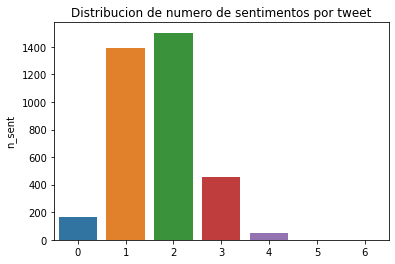

In [8]:
data = df.n_sent.value_counts()
ax = sns.barplot(x = data.index, y = data)
ax.set_title("Distribucion de numero de sentimentos por tweet")
data

Los datos demuestran que existe una mayor cantidad de tweets que tienen asignados dos sentimientos con 1502 datos, seguido 1 sentimiento con 1392

In [9]:
#Dividiendo los dataframes por cada sentimiento para generar un modelo de clasificacion binnaria por cada sentimiento
df_anger = df[['Tweet','anger']]
df_anticipation = df[['Tweet','anticipation']]
df_disgust = df[['Tweet','disgust']]
df_fear = df[['Tweet','fear']]
df_joy = df[['Tweet','joy']]
df_love = df[['Tweet','love']]
df_optimism = df[['Tweet','optimism']]
df_pessimism = df[['Tweet','pessimism']]
df_sadness = df[['Tweet','sadness']]
df_surprise = df[['Tweet','surprise']]
df_trust = df[['Tweet','trust']]

## Guardando los datasets por cada sentimiento

In [10]:
#Saving datasets
df_anger.to_csv('data/df_anger.csv', index = False)
df_anticipation.to_csv('data/df_anticipation.csv', index = False)
df_disgust.to_csv('data/df_disgust.csv', index = False)
df_fear.to_csv('data/df_fear.csv', index = False)
df_joy.to_csv('data/df_joy.csv', index = False)
df_love.to_csv('data/df_love.csv', index = False)
df_optimism.to_csv('data/df_optimism.csv', index = False)
df_pessimism.to_csv('data/df_pessimism.csv', index = False)
df_sadness.to_csv('data/df_sadness.csv', index = False)
df_surprise.to_csv('data/df_surprise.csv', index = False)
df_trust.to_csv('data/df_trust.csv', index = False)